# Исследование объявлений о продаже квартир <a id='intro'></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Требуется определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры, позволяющие  построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение данных из файла

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Прочитаем файл `real_estate_data` и сохраним его в переменную.

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

Получим общую информацию о таблице.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изучим пропуски в имеющихся столбцах.

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В датафрейме 22 столбца из которых 19 столбцов с количественными, 3 с категориальными значениями cо следующими типами данных — `string`, `int`, `float`, `bool`.

Датафрейм представляет собой пул объевлений о продаже квартир и содержит в себе следующую информацию:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении.


**Выводы**

В ходе первичного анализа были выявлены пропуски и аномалии в данных. Часть данных отсутствует по причине того, что они не были указаны при публикации объявления, другая часть, заполняемая системой (например: расстояние до центра города, аэропорта, водоема, парка) на основании предоставленных данных, что может говорить о несовершенстве системных алгоритмов.

[В начало](#intro)

## Предобработка данных

Устраним, где это возможно, выявленные в ходе первичного изучения данных пропуски и аномалии. 

Для начала подкорректируем и приведем к единому стилю названия столбцов для удобства. 

In [5]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                   'parks_around3000': 'parks_around', 
                   'ponds_around3000':'ponds_around'}, inplace=True)
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


В столбце `rooms` имеются строки, содержащие нули. Рассмотрим их. 

In [6]:
df.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Одназачного ответа относительно имеющихся нулей в столбце `rooms` нет, однако, есть предположение, что нули могут принадлежать к квартирам-студиям или к квартирам со свободной планировкой. Проверим эту гипотезу и для этого добавим дополнительное условие к срезу, которое будет учитывать принадлежность квартир с количеством комнат, равным 0 к квартирам-студиям или к квартирам со свободной планировкой.

In [7]:
if (df
    .query('rooms == 0')
    .index
    .equals(df
            .query('rooms == 0 and (studio == True or open_plan == True)')
            .index)):
    print('Индексы датафреймов совпадают')
else:
    print('Индексы датафреймов не совпадают')

Индексы датафреймов совпадают


Как мы можем видеть, дополнительное условие к срезу вернуло аналогичный результат относительно первичного среза. Иными словами, квартиры с количеством комнат равным 0 являются или квартирами-студиями или квартирами со свободной планировкой. Изменять данные не будет.

Также проверим обратную сторону, есть ли квартиры-студии и квартиры со свободной планировкой с количеством комнат !=0.

In [8]:
df.query('rooms != 0 and (studio == True or open_plan == True)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
1379,3,6000000.0,44.20,2015-11-10T00:00:00,1,NaN,25.0,17.40,23,False,False,True,NaN,1.0,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,231.0
2389,5,2250000.0,25.41,2016-06-07T00:00:00,1,NaN,12.0,17.08,8,False,True,False,NaN,2.0,Санкт-Петербург,14125.0,12921.0,2.0,328.0,2.0,485.0,26.0
3187,13,3800000.0,27.00,2016-05-17T00:00:00,1,NaN,14.0,18.00,8,False,True,False,NaN,2.0,Санкт-Петербург,50348.0,16053.0,0.0,NaN,0.0,NaN,45.0
4180,4,4500000.0,34.00,2016-04-25T00:00:00,1,2.80,10.0,21.00,10,False,True,False,NaN,2.0,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,62.0
5668,9,3550000.0,36.70,2016-04-25T00:00:00,1,2.75,16.0,17.80,2,False,False,True,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,61.0
8683,10,3500000.0,32.50,2016-05-05T00:00:00,1,3.00,23.0,29.90,11,False,True,False,NaN,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0
8861,13,5500000.0,64.50,2015-11-13T00:00:00,3,3.00,5.0,48.00,2,False,False,True,NaN,0.0,Санкт-Петербург,20040.0,2621.0,2.0,205.0,2.0,204.0,229.0
9063,6,3800000.0,39.00,2016-05-19T00:00:00,1,NaN,17.0,30.00,1,False,False,True,NaN,0.0,Санкт-Петербург,36721.0,13635.0,0.0,NaN,0.0,NaN,45.0
11026,1,2800000.0,28.00,2016-05-04T00:00:00,1,NaN,26.0,19.00,6,False,True,False,NaN,2.0,посёлок Парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,45.0
12760,0,3350000.0,51.00,2015-01-22T00:00:00,2,2.50,12.0,30.00,10,NaN,False,True,NaN,2.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,521.0


Имеются несколько квартир-студий и квартир со свободной планировкой, по которым прорставлены количество комнат больше 0. Чтобы разобраться в причинах данного обстоятельства обратимся в первоисточник, а именно перейдем на  сайт Яндекс Недвижимость. 

В ходе изучения сайта установлено, что Яндекс Недвижимость относит в отдельную категорию квартиры-студии и квартиры со свободной планировкой. Однако, как в таком случае в данных могли оказаться квартиры-студии и квартиры со свободной планировкой с количеством комнат больше 0? Предположительно, Яндекс Недвижимость использует парсер для поля, где собственники оставляют описание к квартире. Собственники квартир оставляют описания с количеством спальных мест, что может приравниваться к количеству комнат в квартире.  

В любом случае, квартиры-студии и квартиры со свободной планировкой не имеют фиксированного числа комнат, поэтому нельзя выделить по ним количество комнат. Заменим эти значения на 0. 

In [9]:
df.loc[
    (df['rooms'] != 0) & 
    ((df['studio'] == True)|
     (df['open_plan'] == True)), 
    'rooms'
] = 0
df.query('rooms != 0 and (studio == True or open_plan == True)')['rooms'].count()

0

Датафрейм содержит 4 параметра расстояния: ближайшее расстояния до аэропорта, центра города, парка, пруда. Двух разных зданий с четырьмя равными параметрами местопложения с точносью до 1-го метра в рамках города сложно представить. Иначе говоря, 4 параметра местопложения для квартиры унифицируют здание на плоскости карты в котором эта квартира находится. Чем это можем быть полезно? Данные по объявлениям квартир доступны по г. Санкт-Петербург, вероятно, могут быть несколько объявлений из одного жилого здания, узнав это мы можем извечь недостающую подходящую информацию из одного объявления о продаже квартиры для другой. Например: если мы узнаем чему равна высота потолков для одной квартиры в определенном здании, фактически мы узнаем высоту потолков всех квартир в этом здании, так как сложно представить здание с разной высотой потолков для квартир в нем. Данным способом можно определить не только высоту потоклов, но и другие параметры квартир. 

Однако, не стоит рассчитывать на то, что в результате использования данного способа будут устранены все пропуски в датафрейме, этот способ позволит лишь устранить небольшую часть пропусков, но ценно это тем, что заполненные данные высокоточные, так как основаны на самих данных из датафрейма.

Использовать будем не все 4 параметра расстояния, 3 параметров расстояния будет более чем достаточно для унификации здания на плоскости карты. Выберем 3 параметра с наименьшим количеством пропусков в данных для наибольшей эффективности.

In [10]:
# Найдем недостатющие данные о высоте потолков используя
ceiling_data = df[['ceiling_height', 'airports_nearest', 'city_centers_nearest','ponds_nearest']].drop_duplicates().dropna()
ceiling_data  = ceiling_data[~ceiling_data[['airports_nearest', 'city_centers_nearest','ponds_nearest']].duplicated()].reset_index(drop=True)
df = pd.merge(df, ceiling_data , on=['airports_nearest','city_centers_nearest','ponds_nearest'], how='left' )
for i in range(len(df)):
    if pd.isna(df.loc[i, 'ceiling_height_x']):
        df.loc[i, 'ceiling_height_x'] = df.loc[i, 'ceiling_height_y']
df = df.rename(columns = {'ceiling_height_x':'ceiling_height'})

# Найдем недостатющие данные о количестве этажей в здании
floors_data = df[['floors_total', 'airports_nearest', 'city_centers_nearest','ponds_nearest']].drop_duplicates().dropna()
floors_data  = floors_data[~floors_data[['airports_nearest', 'city_centers_nearest','ponds_nearest']].duplicated()].reset_index(drop=True)
df = pd.merge(df, floors_data , on=['airports_nearest','city_centers_nearest','ponds_nearest'], how='left' )
for i in range(len(df)):
    if pd.isna(df.loc[i, 'floors_total_x']):
        df.loc[i, 'floors_total_x'] = df.loc[i, 'floors_total_y']
df = df.rename(columns = {'floors_total_x':'floors_total'})

# Найдем недостатюшщие данные о населенном пункте
locality_data = df[['locality_name', 'airports_nearest', 'city_centers_nearest','ponds_nearest']].drop_duplicates().dropna()
locality_data  = locality_data[~locality_data[['airports_nearest', 'city_centers_nearest','ponds_nearest']].duplicated()].reset_index(drop=True)
df = pd.merge(df, locality_data , on=['airports_nearest','city_centers_nearest','ponds_nearest'], how='left' )
for i in range(len(df)):
    if pd.isna(df.loc[i, 'locality_name_x']):
        df.loc[i, 'locality_name_x'] = df.loc[i, 'locality_name_y']
df = df.rename(columns = {'locality_name_x':'locality_name'})

Вернем оригинальное количество столбцов в датафрейме.

In [11]:
df = df.loc[:,'total_images':'days_exposition']

Оценим, сколько пропущенных значений было заполено в результате применения описанной методики, для этого повторно выведем на экран информацию о количестве пропусков в данных.

In [12]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           7349
floors_total               44
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              34
airports_nearest         5542
city_centers_nearest     5519
parks_around             5518
parks_nearest           15620
ponds_around             5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Таким образом, количество пропусков уменьшилось:
- для столбца с информацией о высоте потолков с 9195 до 7349;
- для столбца с информацией о количестве этажей в здании с 86 до 44;
- для столбца с информацией о населенном пункте с 49 до 34.


Кроме того, дозаполнить пропуски по столбцу с информацией о высоте потолков можно медианным значением. Заполнение пропусков медианным значением по столбам с информацией о количестве этажей в здании и населенном пункте не представляется целосообразным, оставим эти данные как есть.

Осташиеся пропуски по высоте потолков здании заменим медианным значением. Перед этим изучим сами данные. 

In [13]:
df['ceiling_height'].describe()

count    16350.000000
mean         2.770717
std          1.206297
min          1.000000
25%          2.540000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В данные попали квартиры с высотой потолков 1 и 100 метров, это говорит о том, что скорее всего в ходе заполнения информации о квартире жильцами была допушена ошибка. Медианное значение не учитывает такого рода выбросы, заменим пропущенные значения в столбце с информцией о высоте потолков на медианное значение 2.65.  

In [14]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)
df['ceiling_height'].isna().sum()

0

В столбце с иформацией о числе балконов имеются пропуски, что скорее всего свидетельствует об отсутствии балконов у квартир. Заменим пропуски в столбце с информацией о количестве балконов на 0.

In [15]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

Пропущенные значения в столбце с типом квартир апартаменты скорее всего свидетельствует о не принадлежности квартир к апартаментам. Заменим пропуски на False.

In [16]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

Посчитаем количество уникальных значений столбца с информацией о населенном пункте.

In [17]:
def loc_length():
    return print('Количество уникальных занчений locality_name:', 
                 df['locality_name']
                 .unique()
                 .shape[0])

Приведем все значения к нижнему регистру.

In [18]:
df['locality_name'] = df['locality_name'].str.lower()
loc_length()

Количество уникальных занчений locality_name: 365


Заменим букву 'ё' на 'е'.

In [19]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')
loc_length()

Количество уникальных занчений locality_name: 331


Заменим 'городской поселок' на 'поселок городского типа'.

In [20]:
df['locality_name'] = (df['locality_name']
                       .str
                       .replace('городской поселок',
                                'поселок городского типа'))
loc_length()

Количество уникальных занчений locality_name: 324


В столбце с информацией о количестве парков и прудов в пределах 3 км допущены пропуски.

In [21]:
df['parks_around'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [22]:
df['parks_around'].isna().sum()

5518

In [23]:
df['ponds_around'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [24]:
df['ponds_around'].isna().sum()

5518

Пропущенные значения скорее всего свидетельствуют об отсутствии парков и прудов в пределах 3 км. Заменим пропуски на 0.

In [25]:
df['parks_around'] = df['parks_around'].fillna(0)
df['parks_around'].isna().sum()

0

In [26]:
df['ponds_around'] = df['ponds_around'].fillna(0)
df['ponds_around'].isna().sum()

0

Некоторые данные представлены в формате вещественных чисел, такая детализация нам не требуется, приведем данные к формату целых чисел, там где это целесообразно.

In [27]:
try:
    df['last_price'] = df['last_price'].astype(int)
    print('Conversion successful')
except:
    print('Conversion failed')
try:
    df['balcony'] = df['balcony'].astype(int)
    print('Conversion successful')
except:
    print('Conversion failed')
try:
    df['parks_around'] = df['parks_around'].astype(int)
    print('Conversion successful')
except:
    print('Conversion failed')
try:
    df['ponds_around'] = df['ponds_around'].astype(int)
    print('Conversion successful')
except:
    print('Conversion failed')

Conversion successful
Conversion successful
Conversion successful
Conversion successful


Также конверитуем дату к удобному для проведения вычислений формату даты и времени.

In [28]:
try:
    df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], 
                                                format='%Y-%m-%dT%H:%M:%S')
    print('Conversion successful')
except:
    print('Conversion failed')

Conversion successful


По результатам предобработки данных были устранена часть пропусков и аномалии в данных. Пропуски в следующих столбцах оставим как есть: 
- `floors_total`;
- `living_area`;
- `floor`;
- `kitchen_area`;
- `locality_name`;
- `airports_nearest`;
- `city_centers_nearest`;
- `parks_nearest`;
- `ponds_nearest`;
- `days_exposition`.

[В начало](#intro)

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в датафрейм цену квадратного метро за квартиру.

In [29]:
df['square_price'] = (df['last_price']/df['total_area']).astype(int)
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,square_price
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785


Добавим в датафрейм день недели, месяц и год публикации объявления.

In [30]:
df['year_exposition'] = df['first_day_exposition'].dt.year
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,square_price,year_exposition,weekday_exposition,month_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,2019,3,3
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,2018,1,12
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,2015,3,8


Напишем функцию, которая категоризирует квартиры по этажам: первый, последний, другой.

In [31]:
def set_floor(data):
    if data['floor'] == 1:
        return 'Первый'
    elif data['floor'] == data['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

In [32]:
df['floor_category'] = df.apply(set_floor, axis=1)
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,square_price,year_exposition,weekday_exposition,month_exposition,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,2019,3,3,Другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,2018,1,12,Первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,2015,3,8,Другой


Посчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [33]:
df['living_area_ratio'] = df['living_area']/df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area']/df['total_area']
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,square_price,year_exposition,weekday_exposition,month_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,2019,3,3,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,2018,1,12,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,2015,3,8,Другой,0.612500,0.148214


**Выводы**

Рассчитаны и добавлены в таблицу:
- цена за м2;
- дни недели, месяцы и годы публикации объявления;
- соотношение жилой и общей площади;
- соотношение площади кухни и общей площади.

[В начало](#intro)

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

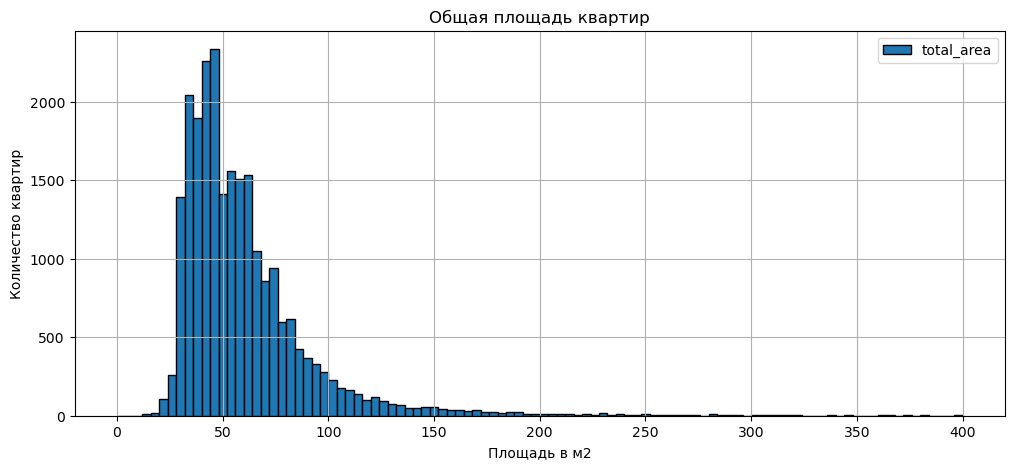

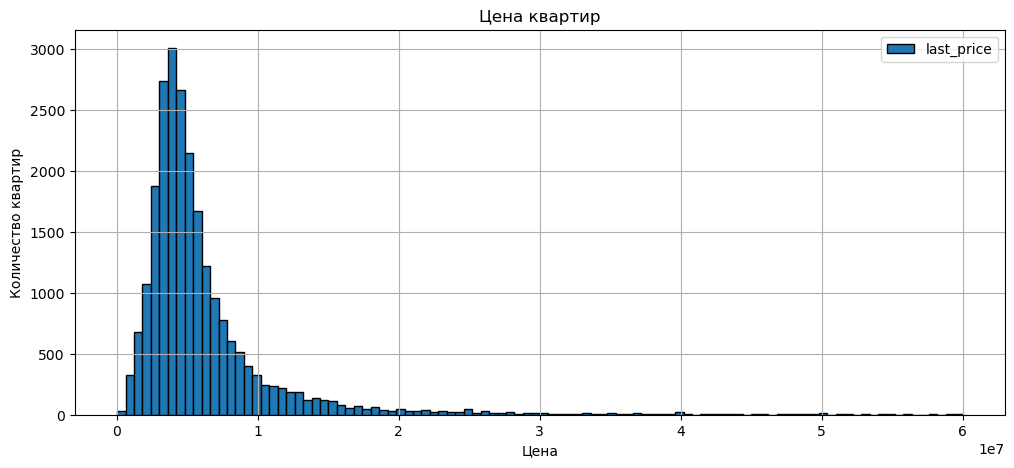

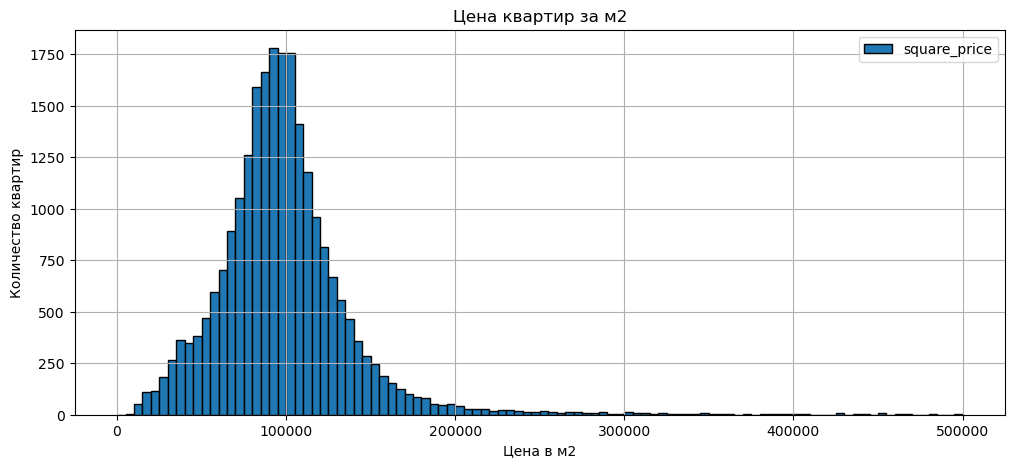

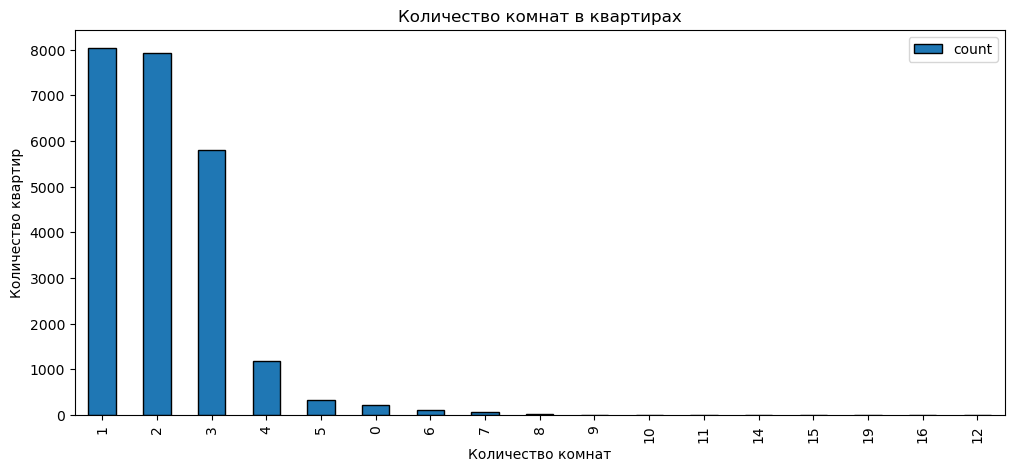

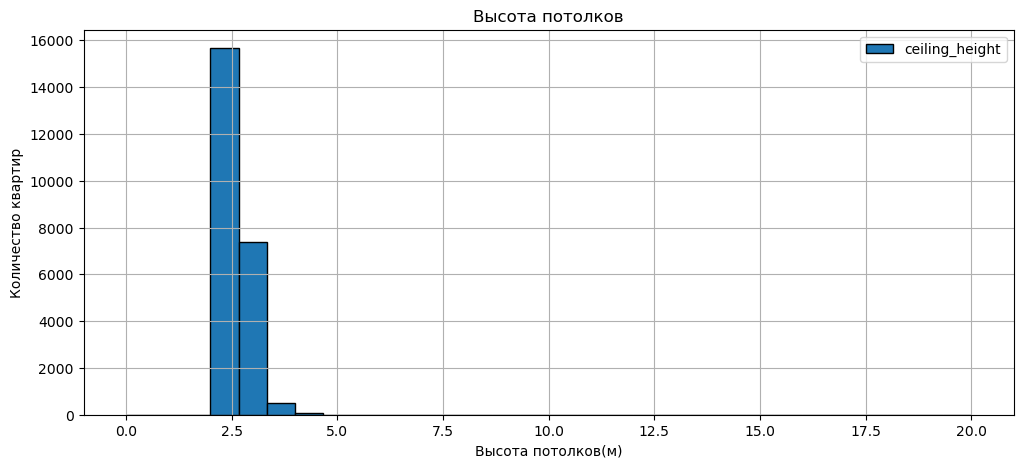

In [34]:
df.plot(kind='hist', 
        y='total_area', 
        bins=100, 
        range=(0, 400), 
        figsize=(12,5), 
        grid=True, 
        ec='black')
plt.title('Общая площадь квартир')
plt.xlabel('Площадь в м2')
plt.ylabel('Количество квартир')
plt.show()

df.plot(kind='hist', 
        y='last_price', 
        bins=100,
        range=(0, 60000000),
        figsize=(12,5), 
        grid=True, 
        ec='black')
plt.title('Цена квартир')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

df.plot(kind='hist', 
        y='square_price', 
        bins=100, 
        range=(0, 500000), 
        figsize=(12,5), 
        grid=True, 
        ec='black')
plt.title('Цена квартир за м2')
plt.xlabel('Цена в м2')
plt.ylabel('Количество квартир')
plt.show()

(df['rooms']
 .value_counts()
 .plot(kind='bar',
       figsize=(12,5),
       ec='black',
       legend=True)
)
plt.title('Количество комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

df.plot(kind='hist', 
        y='ceiling_height', 
        bins=30, 
        range=(0, 20), 
        figsize=(12,5), 
        grid=True, 
        ec='black')
plt.title('Высота потолков')
plt.xlabel('Высота потолков(м)')
plt.ylabel('Количество квартир')
plt.show()

- Гистограмма общей площади квартир имеет длинный хвост, что говорит о наличии выборосов в данных. Основная часть квартир имеет общую площадь от 25 до 75 м2, пик приходится на квартиры с общей площадью в 45 м2. Визуально выбросами можно считать квартиры с общей площадью меньше 20 м2 и больше 150 м2. Указанные квартиры являются не типичными и могут оказать на достоверность результатов исследования, поэтому лучшим решение будет исключить их. 
- В соотвествии с гистограммой цен основная масса квартир стоят от 3 до 6 млн руб., пик приходится на квартиры стоимостью в 4 млн руб. Однако, в т.ч. имеются дорогостоящие квартиры, выбросами будем считать квартиры стомостью свыше 15 млн руб и ниже 300 тыс. руб. Информация про общую цену за квартиру дает мало представления о ней, иными словами могут быть квартиру не дороже 15 млн руб., но с неоправданно высокой ценой за м2. Основная масса квартиры за м2 имеет цену в диапазоне от 70 до 130 тыс. руб. Пик приходится на квартиры с ценой 85 тыс. руб. за м2. Выбросами можно считать квартиры с ценой за м2 ниже 20 и выше 200 тыс. руб., исключение которых повысит достоверность результатов исследования.
- Гистограмма количества квартир с длинным хвостом. Основная масса квартир однушки-двушки. Пик приходится на однокомнтаные квартиры. На отметке ноль расположились квартиры-студии и квартиры со со свободной планировкой у которых нет установленного числа комнат. Однако, таких квартир достаточно мало, поэтому квартиры-студии и квартиры со со свободной планировкой можно считать выбросами. Таким образом, выбросами можно считать квартиры с числом комнат меньше 1 и больше 5.
- Гистограмма высоты потолков показывает, что основная масса квартир расположились в диапазоне от 2,4 до 3,5 метров. Пик приходится на квартиры с высотой потолков от 2,4-2,7 м2. Выбросами считаются квартиры с высотой потолков менее 2.4 и более 4 метров.

Устраним выявленные выбросы. 

In [35]:
good_data = df.copy()
good_data = good_data.query('20 <= total_area <= 150')
good_data = good_data.query('300_000 <= last_price <=15_000_000')
good_data = good_data.query('20_000 <= square_price <=200_000')
good_data = good_data.query('0 < rooms <= 5')
good_data = good_data.query('2.4 < ceiling_height <= 3.5')

Проанализируем длительность продажи квартир. Посмотрим числовое описание квартир.

In [36]:
df['days_exposition'].describe().astype(int)

count    20518
mean       180
std        219
min          1
25%         45
50%         95
75%        232
max       1580
Name: days_exposition, dtype: int64

В данных имеются выбросы, об этом свидетельствует разница между среднеарифметическим сроком продажи квартир и медианным сроком, 180 дней против 95. Кроме того, стандартное отлонение несколько превышает среднеарифметическое, для полной картины построим гистограмму в комбинации с диаграммой размаха.

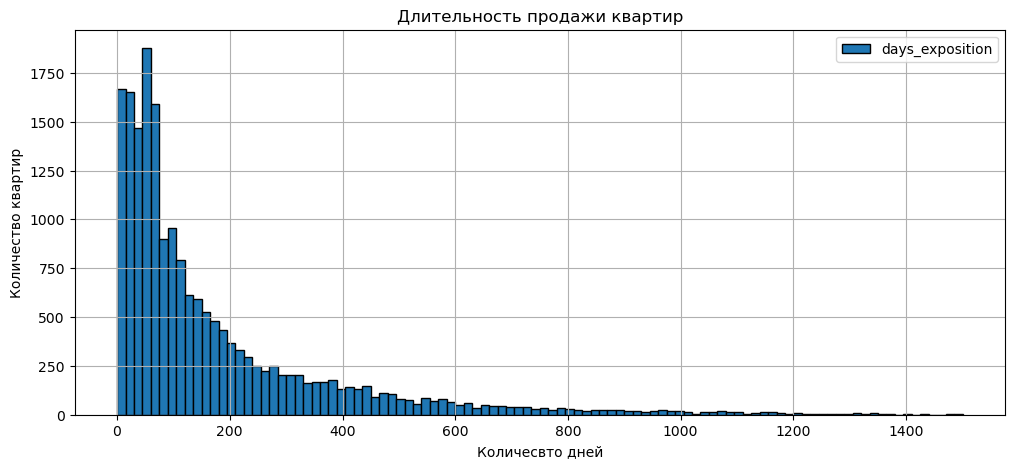

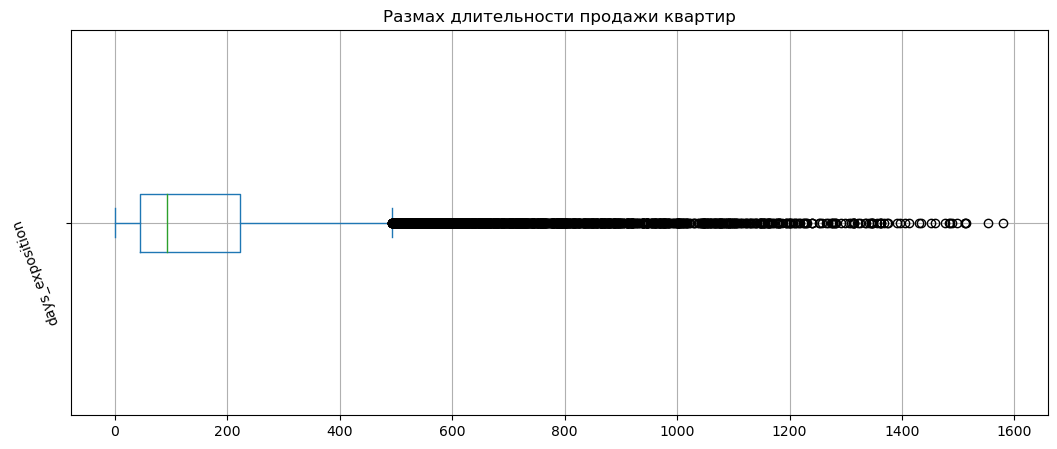

In [37]:
good_data.plot(kind='hist', 
               y = 'days_exposition', 
               bins=100, 
               range=(0, 1500),
               figsize=(12,5),
               grid=True,
               ec='black')

plt.title('Длительность продажи квартир')
plt.xlabel('Количесвто дней')
plt.ylabel('Количество квартир')
plt.show()

good_data.plot.box(column='days_exposition', 
                   vert=False, 
                   figsize=(12.6, 5), 
                   grid=True)
plt.title('Размах длительности продажи квартир')
plt.yticks(rotation=110)
plt.show()

Гистограмма имеет длинный хвост. Основная масса квартир продается в период до 100 дней. Пик приходится на 60 дней. Однако, публикация объявления о продаже квартиры не гарантирует ее 100% фактическую продажу: объявление могло быть снято владельцем, который передумал продажу квартиры, вероятна также ситуация при котором после продажи владельцы квартир забывают снять объвления о продаже квартиры, что искусственно повышает срок реализации, но, к сожалению, отследить это мы не можем. 

Визуально можно сказать, что долгим считается продажа квартир свыше приблизительно 500 дней. Расчетным путем можно установить точную цифру, но мы остановимся на 550 дней и продолжим исследование. 

In [38]:
good_data = good_data.query('days_exposition <= 550')

In [39]:
good_data['days_exposition'].describe().astype(int)

count    17674
mean       130
std        126
min          1
25%         41
50%         84
75%        184
max        550
Name: days_exposition, dtype: int64

Устранение выбросов положительно отразилось на среднеарифметическом сроке продажи квартиры, что подтверждает корректность данных. Кроме того, среднеквадратическое отклонение находится на уровне среднеарифметического, что говорит об отсутствии выбросов, двигаемся дальше. 

Перейдем к изучению даты и времени публикации объявлений о продаже квартир.

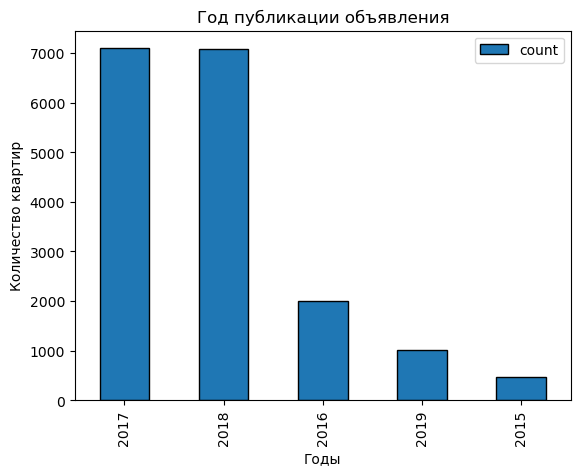

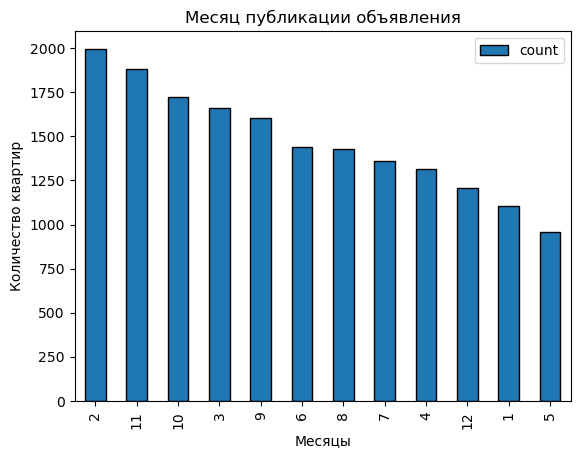

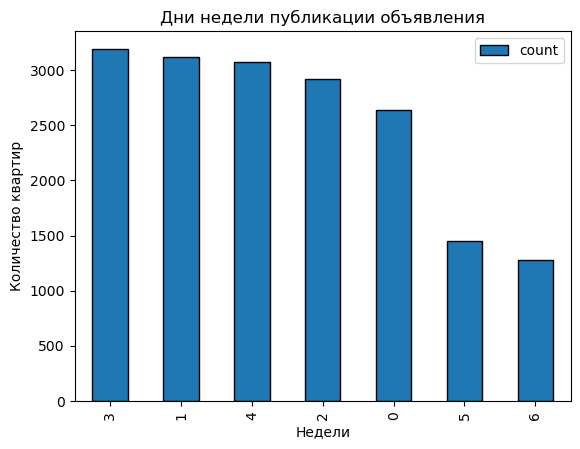

In [40]:
(good_data['year_exposition']
 .value_counts()
 .plot(kind='bar',
       ec='black',
       legend=True)
)
plt.title('Год публикации объявления')
plt.xlabel('Годы')
plt.ylabel('Количество квартир')
plt.show()

(good_data['month_exposition']
 .value_counts()
 .plot(kind='bar',
       ec='black',
       legend=True)
)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяцы')
plt.ylabel('Количество квартир')
plt.show()

(good_data['weekday_exposition']
 .value_counts()
 .plot(kind='bar',
       ec='black',
       legend=True)
)
plt.title('Дни недели публикации объявления')
plt.xlabel('Недели')
plt.ylabel('Количество квартир')
plt.show()


- Больше всего объявлений было опубликовано в 2017-2018 годах. Гистограмма показывает спад в 2019 году, который обусловлен тем, что за этот год данные представлены лишь до 01.05.2019. В период до 2017 года наблюдается существенный рост в публикации объявлений, 2018 год практически повторяет результат 2017 года. Такой рост может быть обусловлен разными факторами: политика Яндекс Недвижимость, региональные проблемы и др. 

- По второй гистограмме можно сделать вывод, что люди в основом склонны к продаже квартир за месяц до и после нового года, спад вероятно обусловлен с подготовкой и празднованием нового года, в середине года наблюдается просадка в публикации объявлений, после наблюдается постепенный рост активности. 

- Наблюдается спад активности публикации объявлений в выходные, после выходных люди долго расскачиваются и пик активности приходится на середину недели.

Рассмотрим от каких факторов зависит цена на квартиры. Для этого построим матрицу кореляции.

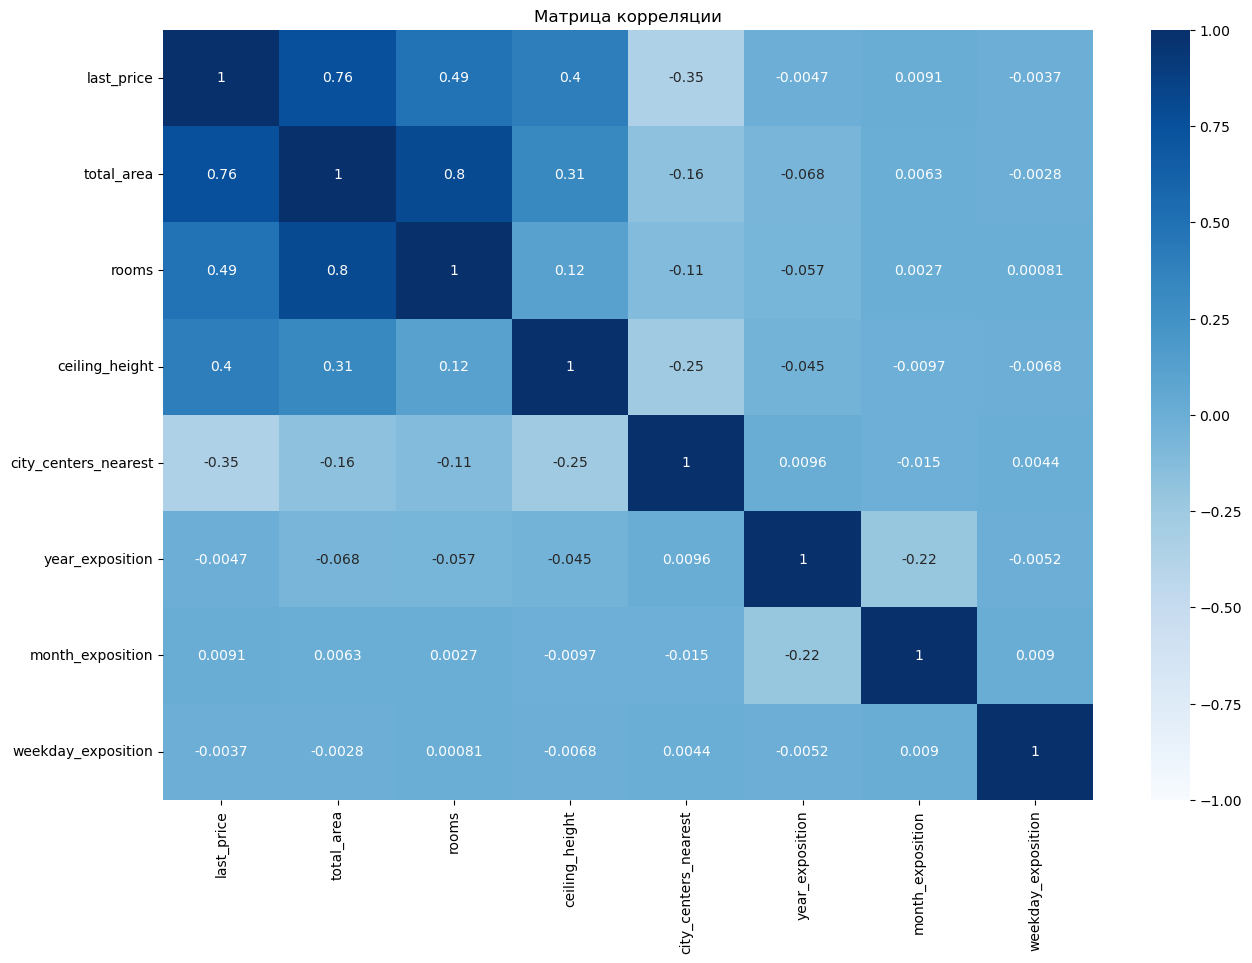

In [41]:
corr_matrix = (
    good_data[['last_price',
               'total_area',
               'rooms',
               'ceiling_height',
               'city_centers_nearest',
               'year_exposition',
               'month_exposition',
               'weekday_exposition']]
               .corr()
)
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix,
            vmin=-1, 
            vmax=1,
            annot=True,
            cmap='Blues')
plt.title('Матрица корреляции')
plt.show()

Из матрицы корреляции видно, что самая сильная линейная связь между ценой и площадью квартир, рост одного параметра означает рост другого. Кроме того, количество комнат, высота потолков также влияет на рост цен на квартиру. Имеется отрицательная линейная связь между расстоянием до центра города и стоимостью квартир, однако, это не совсем так, ведь дело в том, что со снижением ростояния до центра города растет цена на квартиры. Судя по матрице корреляции можно сказать, что какая либа связь прямая или обратная между годом, месяцем, неделей размещения объявления о продаже квартиры и ее стоимостью отсутствует.

Рассмотрим связь между этажом квартир и ее стоимостью.

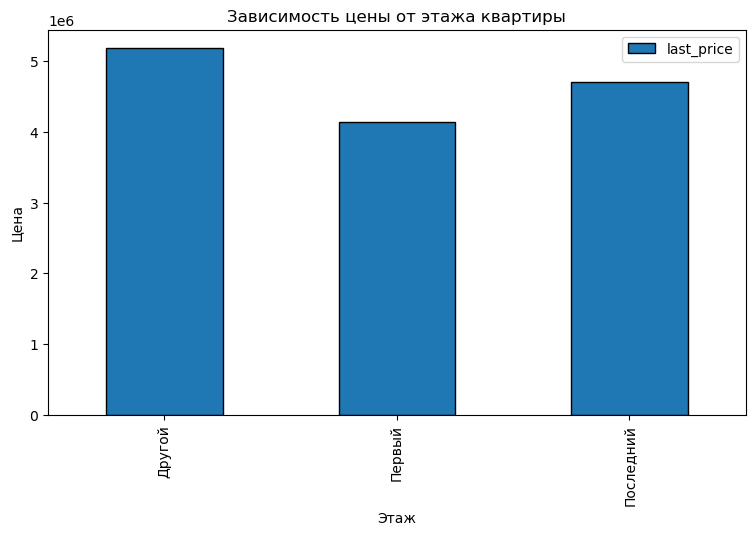

In [42]:
(good_data
 .pivot_table(index='floor_category', 
              values='last_price',
              aggfunc=['count', 
                       'mean'])
 .plot(kind='bar',
       y='mean',
       ec='black',
       figsize=(9, 5))
)

plt.title('Зависимость цены от этажа квартиры')
plt.ylabel('Цена')
plt.xlabel('Этаж')
plt.show()

По графику видно, что квартиры, расположенные на первом этаже имеют самую низкую среднюю стоимость. Самая высокую среднюю стоимость имеют квартиры, попадающие под категорию 'Другой'. Иными словами, квартиры на первых и последних этажах имеют низкий спрос, следовательно, имеют низкую стоимость.

Рассмотрим также более подробно влияние разных параметров на цену квартир.

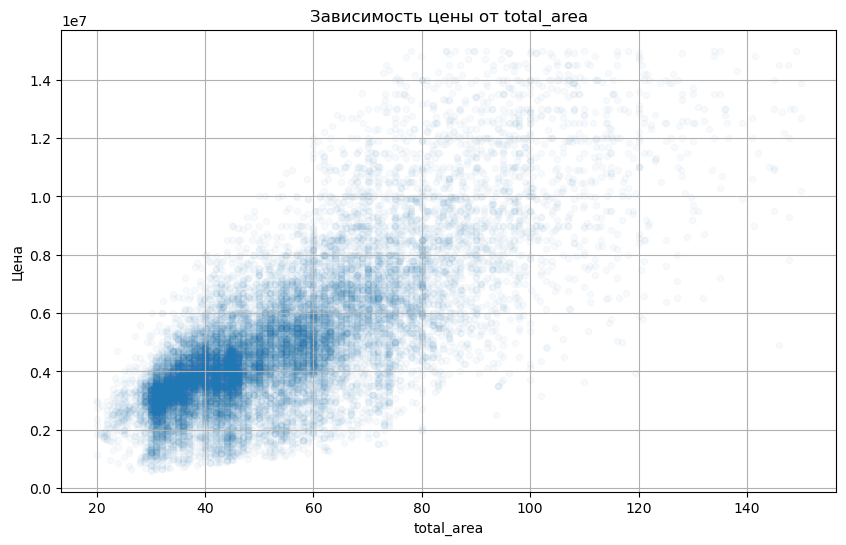

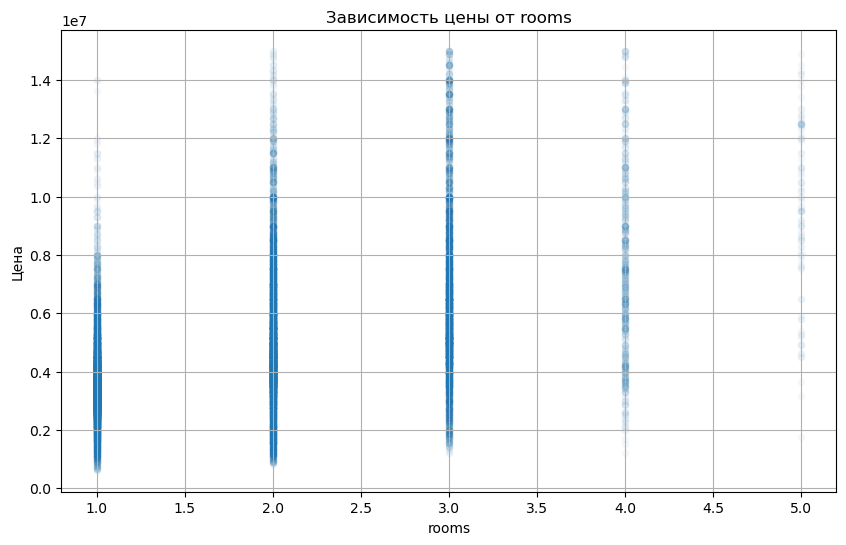

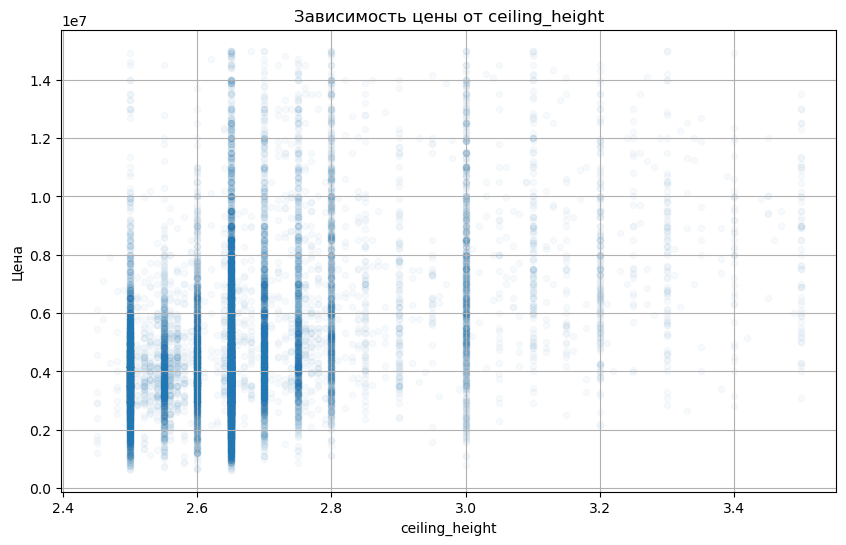

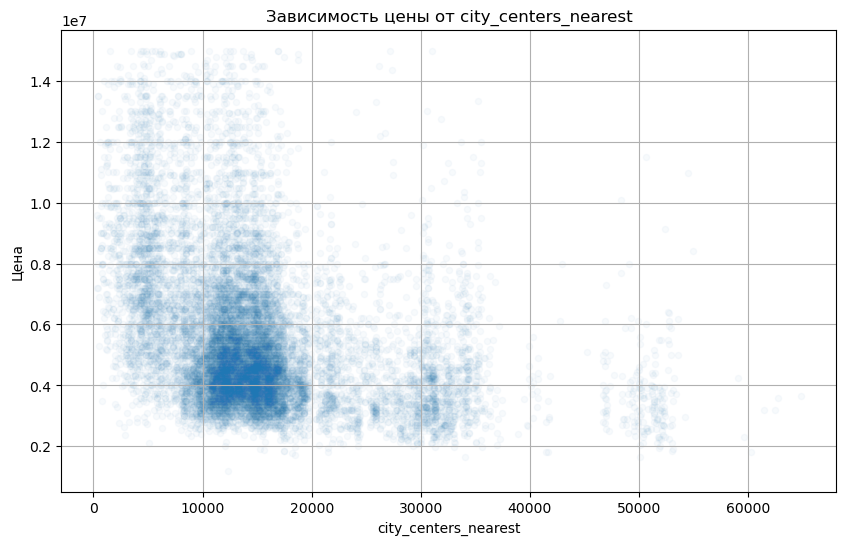

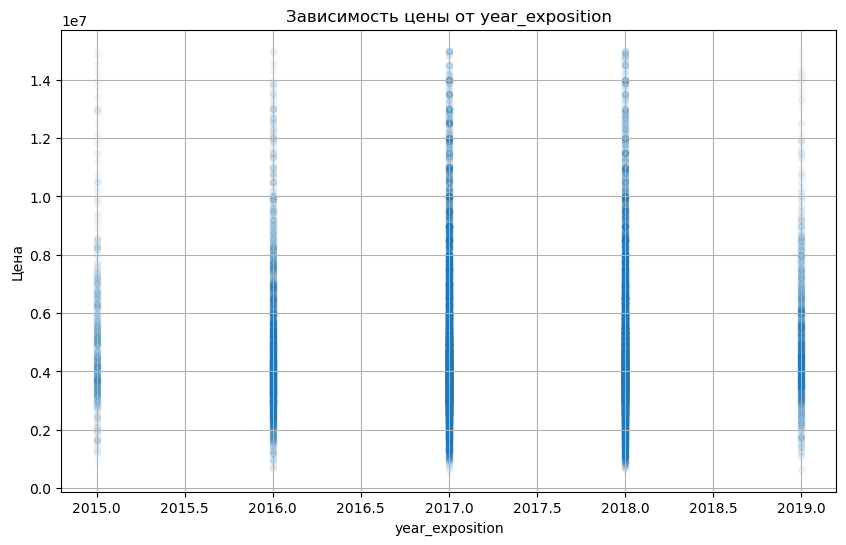

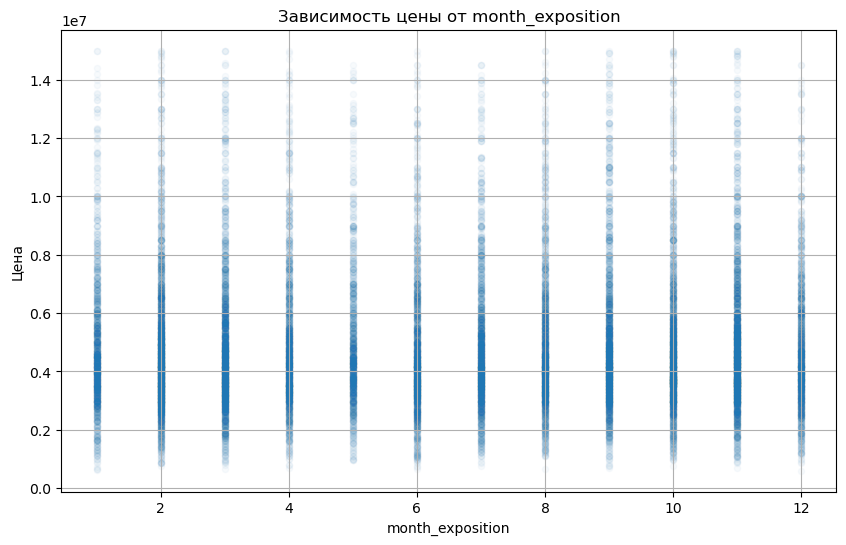

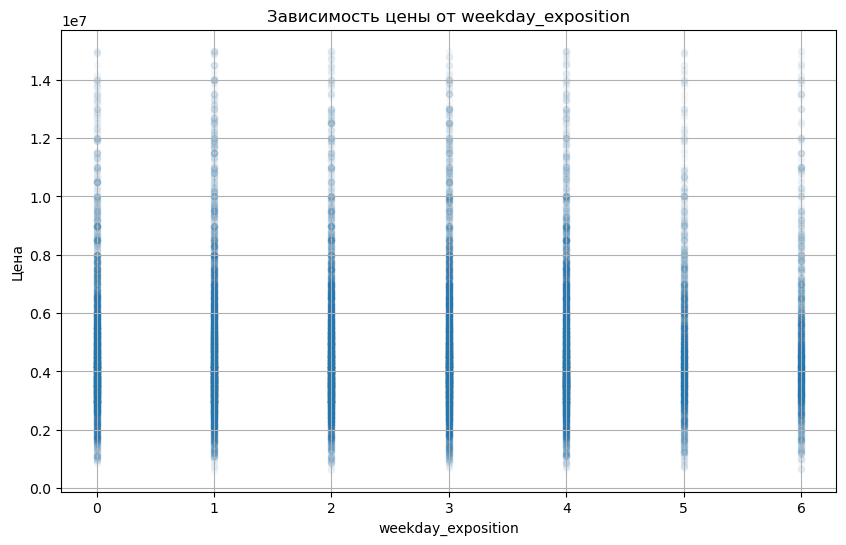

In [43]:
columns = ['total_area',
           'rooms',
           'ceiling_height',
           'city_centers_nearest',
           'year_exposition',
           'month_exposition',
           'weekday_exposition']
    
for column in columns:
    good_data.plot(kind='scatter', 
                   x=column, 
                   y='last_price', 
                   grid=True,
                   alpha=0.03,
                   figsize=(10, 6))
    plt.title(f'Зависимость цены от {column}')
    plt.ylabel('Цена')
    plt.xlabel(column)
    plt.show()

- Основная масса квартир с площадью от 30 до 50 м2 со стоимостью от 2 до 5 млн руб. С ростом площади квартир растет разброс значений, квартиры могут стоять больше или даже меньше общего тренда стоимости, разброс значений ощущается сильнее, так как количество квартир с ростом площади значительно сокращается.

- Стоимость основной массы однокомнатных квартир варьируется до 8 млн руб., верхний порог по двухкомнатным квартирам порядка 10 млн руб. по трехкомнатным до 15 млн руб. Связь между стоимостью квартиры с 4-мя комнатами и выше прослеживается недостаточно, посколько количество самих таких квартир небольшое.

- Для основной массы квартир высота потолков варьируется от 2,5 до 2,7 метров. С ростом высоты потолков растет верхняя граница стоимости квартир, особенно хорошо это заметно по квартирам с высотой потолков от 2,6 метров. Для квартир с высотой потолков 2,5 метра цена варьируется от 1 до 6 млн руб., по квартирам с высотой потолков 2,65 метров цена от 1 до 8 млн руб. по остальным квартирам, где высота потолков выше нижний порог цен выше.

- Большинство квартир расположено в радиусе от 10 до 18 км от центра города со стоимость от 3 до 6 млн руб. Плохо отслеживается связь между рост стоимости квартир в радиусе до 10 км от центра города. Разумеется, с ростом отдаленности от центра города растет радиус и территория, следовательно растет количество объявлений. Иными словами, в радиусе до 10 км количество объявлений слишком мало, чтобы прорисовалась четкая линейная связь, но она есть, мы можем видеть очертания движения графика вверх, если снизить прозрачность эти очертания прорисуются более четче.

- По графику зависимости цены от года размещения не наблюдаются четкая линейная связь, другими словами наблюдается некоторая стабильность цен на рынке недвижимости в рассматриваемый период, в более длинном временном отрезке эта связь была бы сильнее. Аналогично по месяцам и дням недели не наблюдается зависимость.

Наиболее наглядно зависимость стоимости квартиры от удаленности от центра города можно оследить на графике. Для этого найдем среднюю стоимость квартир за каждый км до центра города. 

/var/folders/2z/z1w63pw905z468w3z7m0z2kw0000gn/T/ipykernel_2692/860870196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['city_centers_nearest_km'] = round(good_data['city_centers_nearest']/1000)


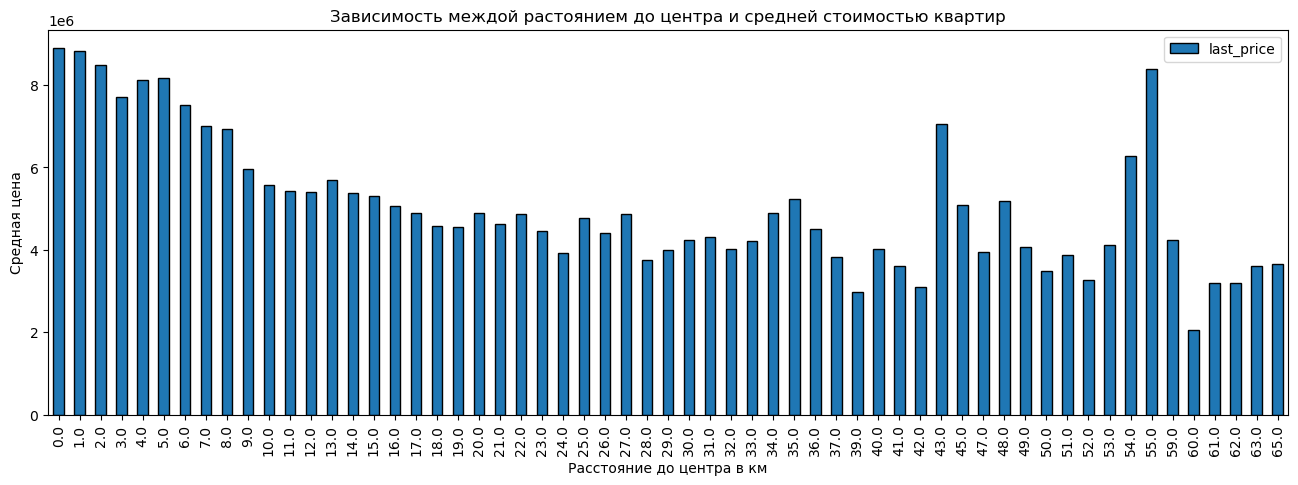

In [44]:
good_data['city_centers_nearest_km'] = round(good_data['city_centers_nearest']/1000)
(good_data.pivot_table(index='city_centers_nearest_km',
                       values='last_price')
 .plot(kind='bar',
       figsize=(16,5), 
       ec='black', 
       legend=True))

plt.title('Зависимость междой растоянием до центра и средней стоимостью квартир')
plt.xlabel('Расстояние до центра в км')
plt.ylabel('Средная цена')
plt.show()

Также рассмотрим числовое значение корреляции между средней ценой на квартиры и удаленностью от центра.

In [45]:
(good_data.
 pivot_table(index='city_centers_nearest_km', 
             values='last_price')
 .reset_index()
 .corr())

,city_centers_nearest_km,last_price
city_centers_nearest_km,1.0000,-0.6492
last_price,-0.6492,1.0000


Зависимость стало сильнее за счет усреднения выбросов, что нам показывает более реальную картину зависимости.

Проанализуем стоимость жилья в топ 10 регионах с наибольшим числом объявлений. Визуализируем данные.

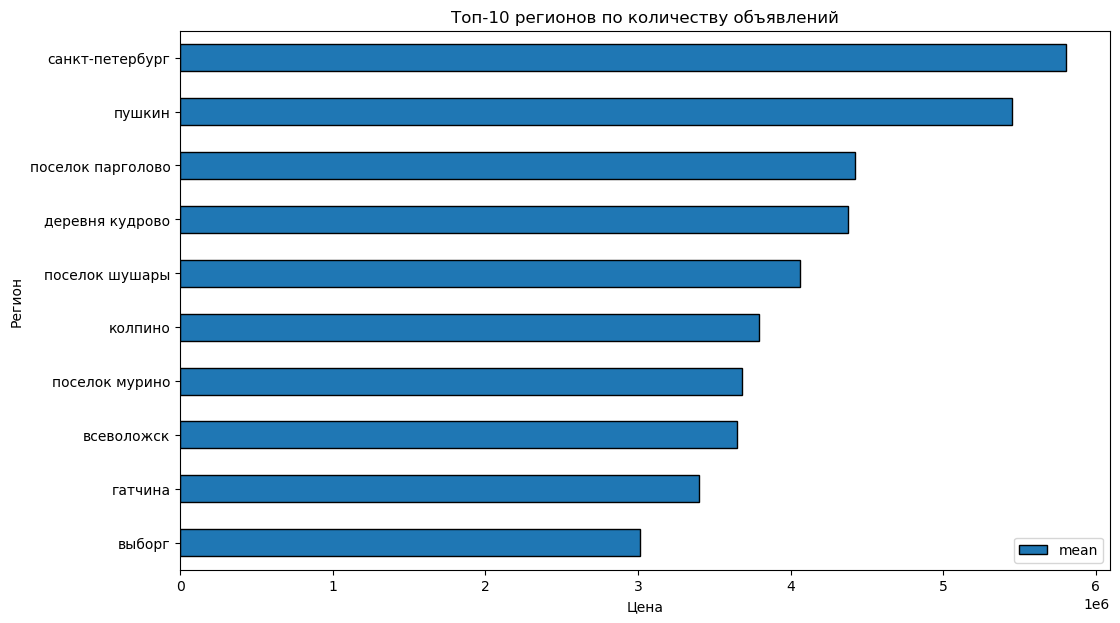

In [46]:
top_10 = good_data.pivot_table(index='locality_name', 
                               values='last_price', 
                               aggfunc=['mean','count'])
top_10.columns=['mean','count']
top_10 = top_10.sort_values(by='count', ascending=False).head(10)
top_10.sort_values(by='mean', inplace=True)

top_10.plot(kind='barh', 
            y='mean', 
            figsize=(12, 7), 
            ec='black')
plt.title('Топ-10 регионов по количеству объявлений')
plt.ylabel('Регион')
plt.xlabel('Цена')
plt.show()

Как и ожидалось, в среднем самая дорогая недвижимость в Санкт-Петерурге, в топ также вошли другие близлежащие регионы.

Проанализируем изменение средней цены квартир за каждый километр до центра города.

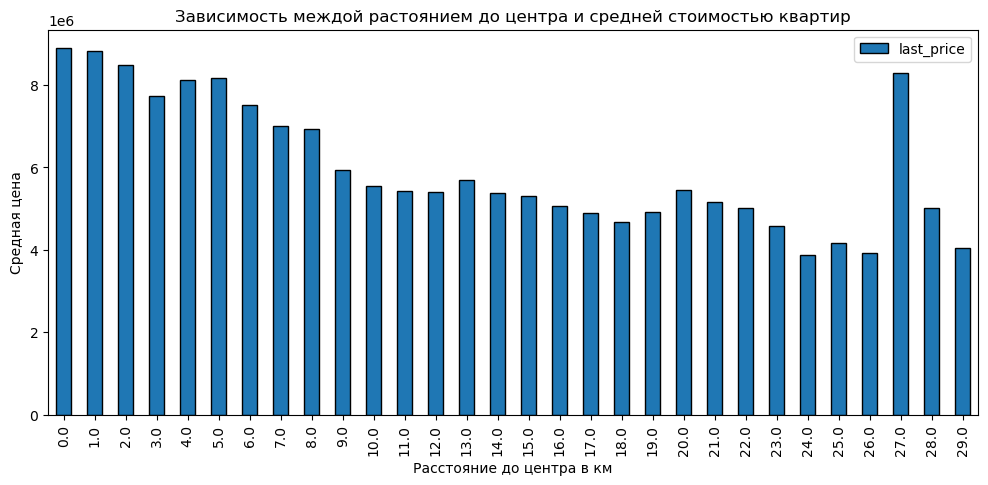

In [47]:
(good_data[good_data['locality_name'] == 'санкт-петербург']
 .pivot_table(index='city_centers_nearest_km', 
              values='last_price')
 .plot(kind='bar',
       figsize=(12,5), 
       ec='black', 
       legend=True))

plt.title('Зависимость междой растоянием до центра и средней стоимостью квартир')
plt.xlabel('Расстояние до центра в км')
plt.ylabel('Средная цена')
plt.show()

По графику видно, что пик средней цены квартиры находится в расстоянии до 1 км от центра города. Наблюдается резкий скочок на 8 км от центра города, квартиры в радиусе 8 км представляют центральную зону города, где расположены самые дорогие квартиры.

Изучим следующие параметры: площадь, цена, число комнат, высота потолков отдельно для квартиры из центральной зоны города. Построим гистограммы для каждого параметра и сравним с общими результатами, полученными ранее.

In [48]:
central_area = good_data[good_data['city_centers_nearest_km'] <= 8]
central_area.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,square_price,year_exposition,weekday_exposition,month_exposition,floor_category,living_area_ratio,kitchen_area_ratio,city_centers_nearest_km
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,2018,1,6,Другой,0.320000,0.410000,8.0
24,8,6500000,97.2,2015-10-31,2,2.65,3.0,46.5,1,False,False,False,19.6,0,санкт-петербург,20052.0,2336.0,3,411.0,3,124.0,265.0,66872,2015,5,10,Первый,0.478395,0.201646,2.0
70,9,3400000,30.0,2018-09-05,1,2.65,5.0,16.0,1,False,False,False,7.0,0,санкт-петербург,39053.0,8313.0,1,382.0,0,NaN,14.0,113333,2018,2,9,Первый,0.533333,0.233333,8.0


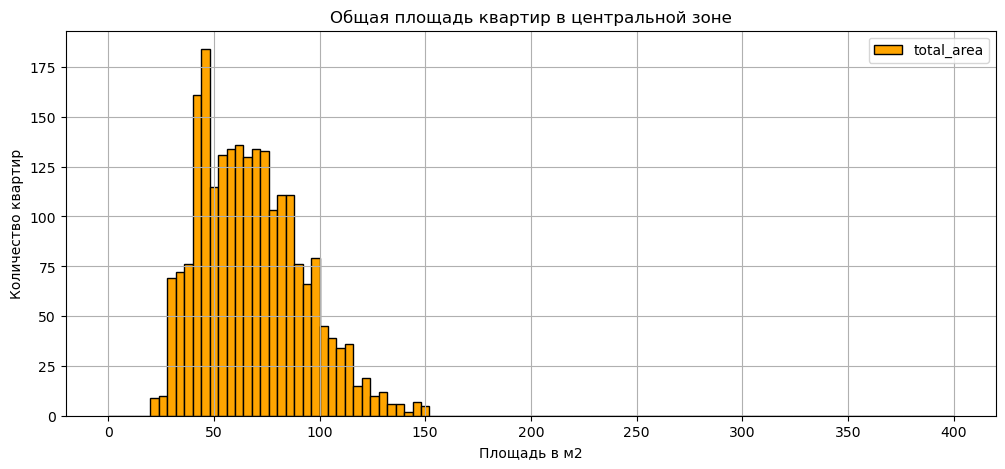

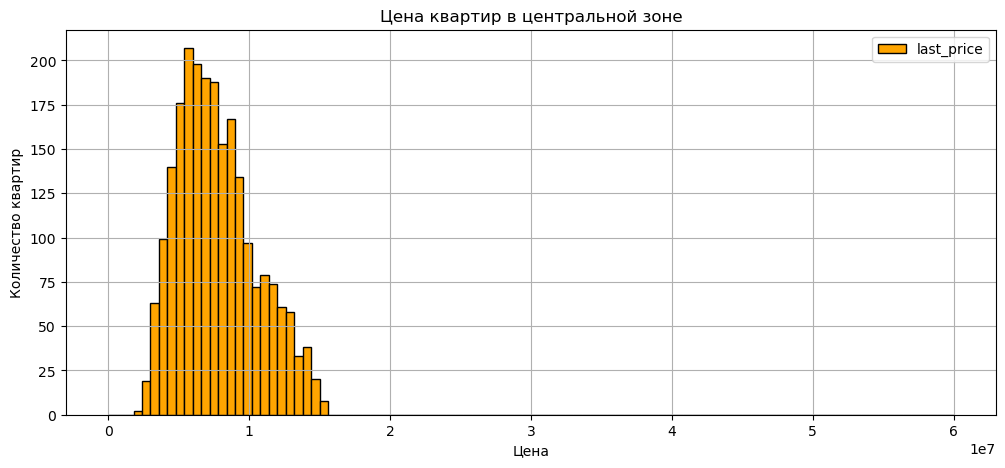

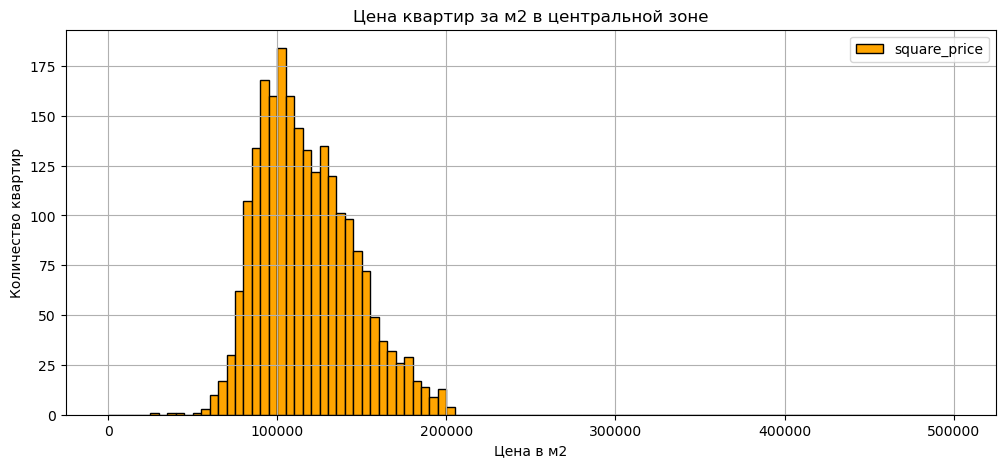

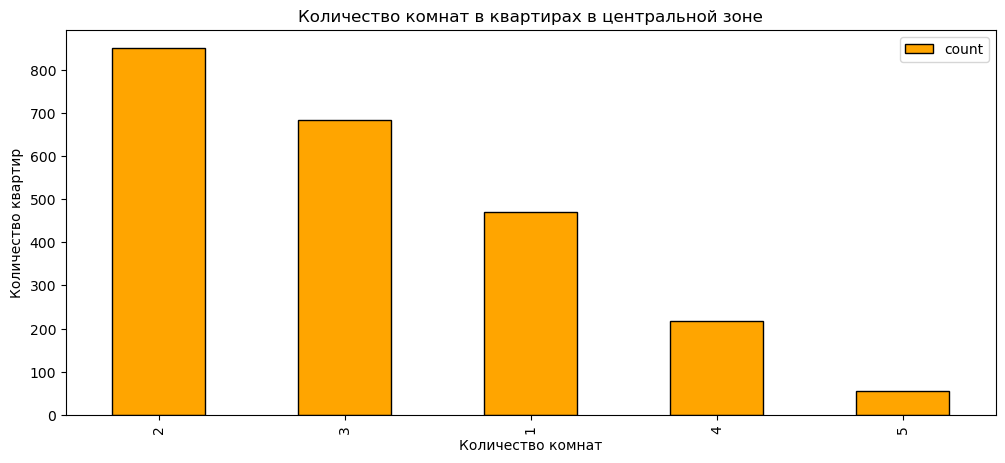

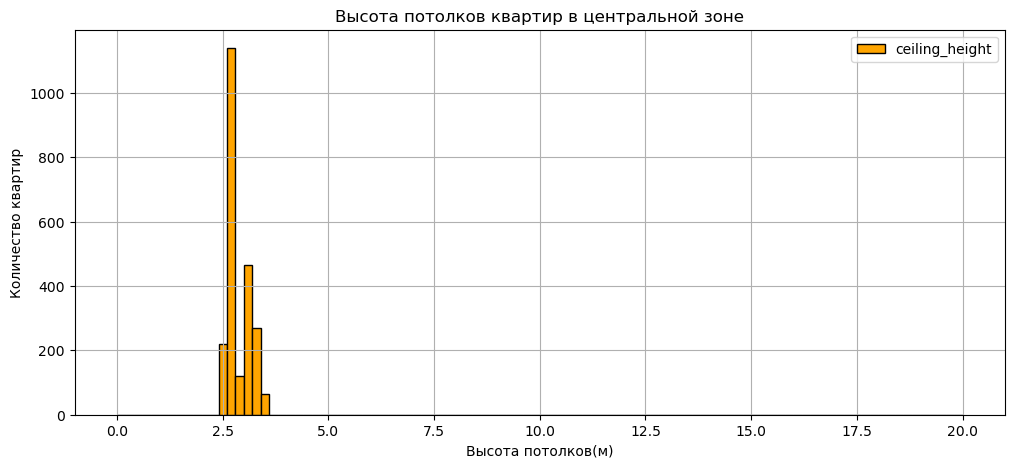

In [49]:
central_area.plot(kind='hist',
                  y='total_area',
                  bins=100,
                  range=(0, 400), 
                  figsize=(12,5), 
                  grid=True,
                  ec='black',
                  color='orange')
plt.title('Общая площадь квартир в центральной зоне')
plt.xlabel('Площадь в м2')
plt.ylabel('Количество квартир')
plt.show()

central_area.plot(kind='hist',
                  y='last_price', 
                  bins=100,
                  range=(0, 60000000),
                  figsize=(12,5), 
                  grid=True,
                  ec='black',
                  color='orange')
plt.title('Цена квартир в центральной зоне')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

central_area.plot(kind='hist',
                  y='square_price', 
                  bins=100, 
                  range=(0, 500000), 
                  figsize=(12,5), 
                  grid=True, 
                  ec='black',
                  color='orange')
plt.title('Цена квартир за м2 в центральной зоне')
plt.xlabel('Цена в м2')
plt.ylabel('Количество квартир')
plt.show()

(central_area['rooms']
 .value_counts()
 .plot(kind='bar',
       ec='black',
       legend=True,
       figsize=(12,5),
       color='orange')
)
plt.title('Количество комнат в квартирах в центральной зоне')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

central_area.plot(kind='hist',
                  y='ceiling_height', 
                  bins=100, 
                  range=(0, 20), 
                  figsize=(12,5), 
                  grid=True, 
                  ec='black',
                  color='orange')
plt.title('Высота потолков квартир в центральной зоне')
plt.xlabel('Высота потолков(м)')
plt.ylabel('Количество квартир')
plt.show()

- Основная часть квартир в центральной зоне имеет общую площадь от 25 до 100 м2, по всему городу, включая область этот показатель равен 25-75 м2, иными словами в центральной зоне площадь квартир больше. Однако пик здесь тот же, то есть 45 м2.

- Основная часть квартир в центральной зоне стоят от 3 до 10 млн руб, по всему городу включая область этот показатель равен 3-6 млн руб. Пик цен в центральной зоне больше и составляет 6 млн ру6. 

- Основная масса квартиры в центральной зоне за м2 имеет цену в диапазоне от 80 до 150 тыс. руб., в то время как по всему городу включая область этот показатель составляет 75-130 тыс. руб, цена за квадратные метр как и ожидаемо дороже. Пик смещен в большую сторону и соствляет около 105 тыс. руб. 

- Основная масса квартир в центральной зоне двушки-трешки, по всему городу включая область больше однушек-двушек. Пик смещен с однушек на двушки. 

- Основная масса квартир в центральной зоне с высотой в диапазоне от 2,4 до 3,5 метров, аналогичные значения по всему городу включая область, в том числе и по пиковому значению высоты потолков.

Проанализируем также длительность продажи квартир в центральной зоне.

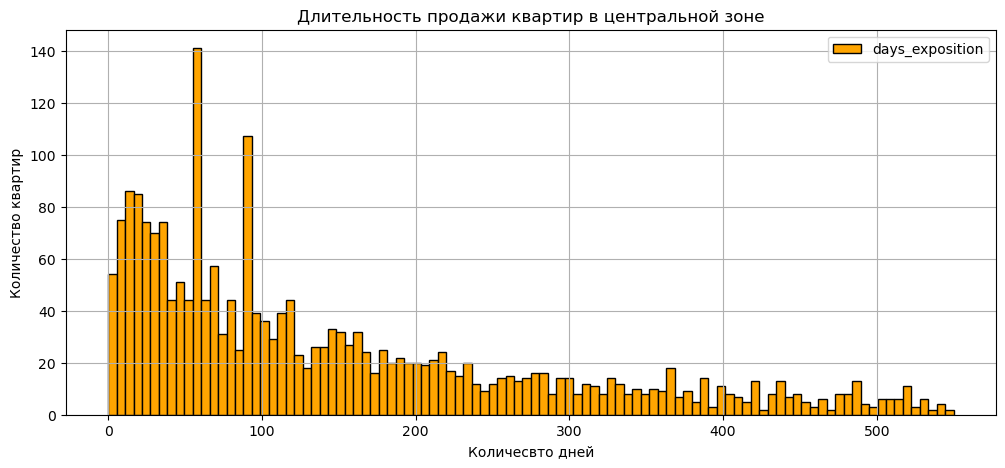

In [50]:
central_area.plot(kind='hist', 
                  y = 'days_exposition', 
                  bins=100, 
                  range=(0, 550),
                  figsize=(12,5),
                  grid=True,
                  ec='black',
                  color='orange')

plt.title('Длительность продажи квартир в центральной зоне')
plt.xlabel('Количесвто дней')
plt.ylabel('Количество квартир')
plt.show()

Длительность продажи квартир в центральной зоне почти такая же как и по всему городу включая область. т.е. основная масса квартир продается в период до 100 дней. Пик приходится на 60 дней. 

Изучим дату и время публикации объявлений о продаже квартир в центральной зоне.

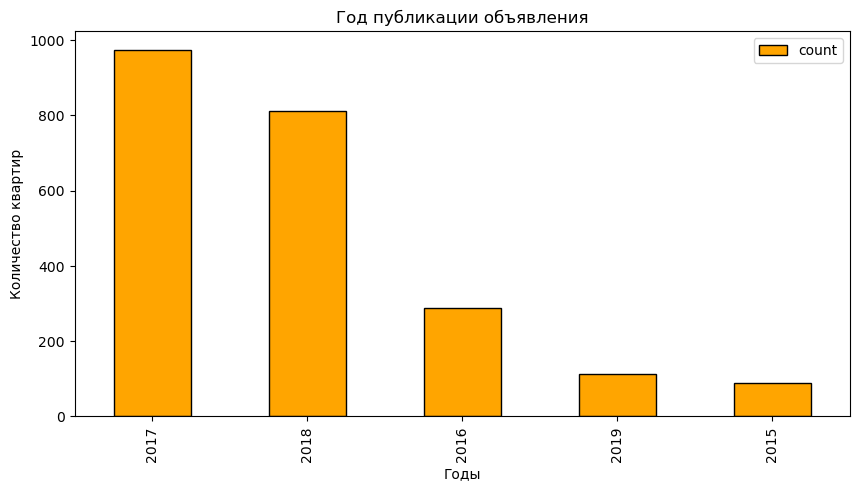

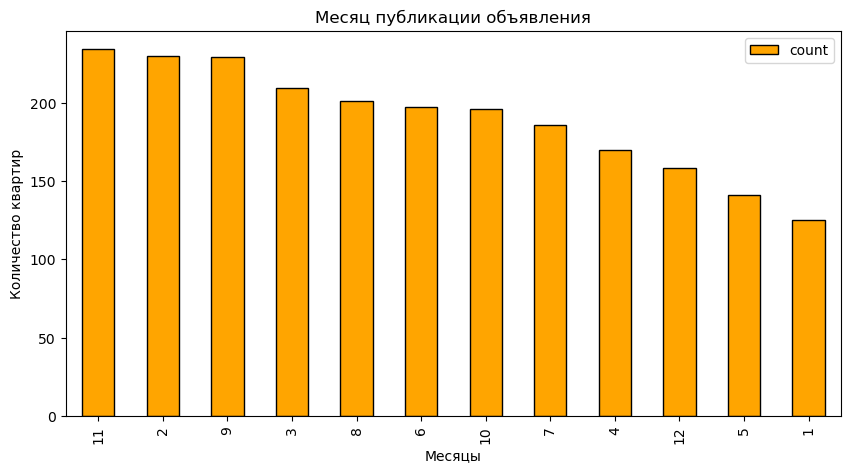

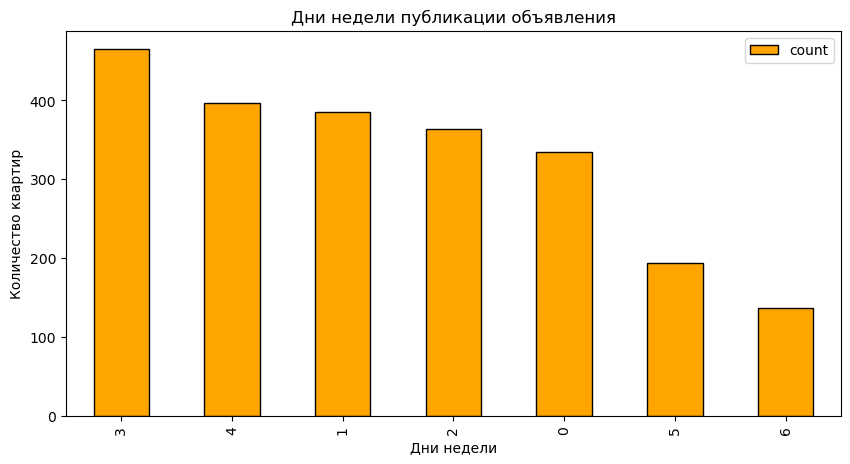

In [51]:
(central_area['year_exposition']
 .value_counts()
 .plot(kind='bar',
       ec='black',
       color='orange',
       figsize=(10,5),
       legend=True)
)
plt.title('Год публикации объявления')
plt.xlabel('Годы')
plt.ylabel('Количество квартир')
plt.show()

(central_area['month_exposition']
 .value_counts()
 .plot(kind='bar',
       ec='black',
       color='orange',
       figsize=(10,5),
       legend=True)
)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяцы')
plt.ylabel('Количество квартир')
plt.show()

(central_area['weekday_exposition']
 .value_counts()
 .plot(kind='bar',
       ec='black',
       color='orange',
       figsize=(10,5),
       legend=True)
)
plt.title('Дни недели публикации объявления')
plt.xlabel('Дни недели')
plt.ylabel('Количество квартир')
plt.show()

Показатели практически идентичны, в центральной зоне также как и по всему городу включая область:
- больше всего объявлений было опубликовано в 2017-2018 годах;
- наблюдается спад в 2019 году, обусловленный наличием информации до 01.05.2019;
- пиковое значение приходится на 2017 год;
- население сколонно к продаже квартир за месяц до и после нового года;
- наблюдается просадка в публикации объявлений в середине года и по выходным;
- пик активности публикации объявлений приходится на середину недели.

Рассмотрим от каких факторов зависит цена на квартиры в центральной зоне.

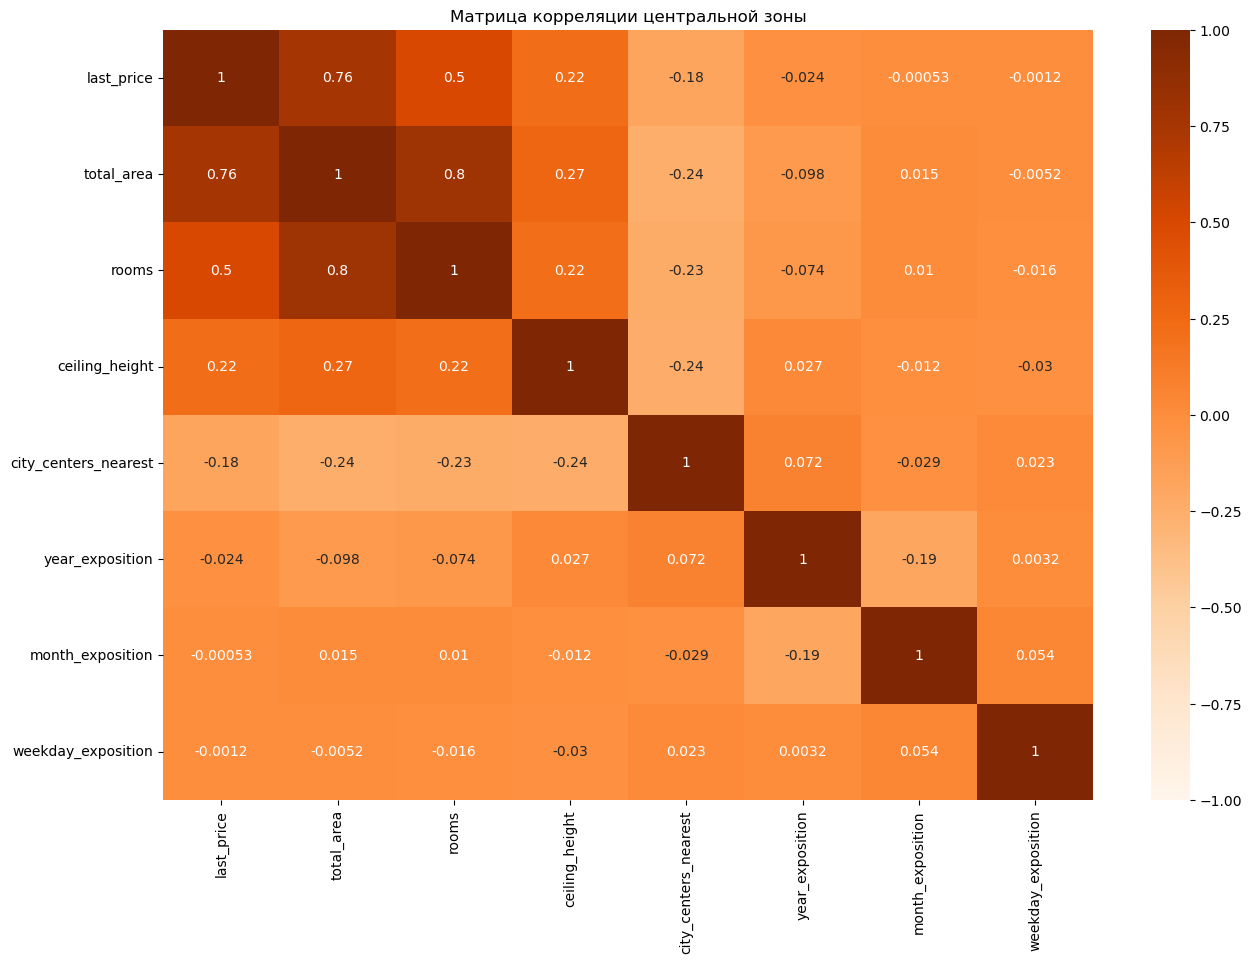

In [52]:
corr_matrix_central_area = central_area[['last_price',
                                         'total_area',
                                         'rooms',
                                         'ceiling_height',
                                         'city_centers_nearest',
                                         'year_exposition',
                                         'month_exposition',
                                         'weekday_exposition']].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix_central_area,
            vmin=-1, 
            vmax=1,
            annot=True,
            cmap='Oranges')
plt.title('Матрица корреляции центральной зоны')
plt.show()

Аналогично данным по всему городу, включая область в центральной цоне, положительная сильная линейная связь наблюдается между ценой и площадью, а также ценой и количеством комнат. Не сильная линейная зависимость между удаленностью от центра города и стоимостью квартир. 

Посмотрим зависимость между удаленностью от центра города и средней стримостью квартир. 

In [53]:
(good_data[good_data['locality_name'] == 'санкт-петербург']
 .pivot_table(index='city_centers_nearest_km', 
              values='last_price')
 .reset_index()
 .corr())

,city_centers_nearest_km,last_price
city_centers_nearest_km,1.000000,-0.775418
last_price,-0.775418,1.000000


Как можем видеть, наблюдается сильная ленйная связь, со снижением расстояния до центра города растет средняя цена на квартиру.

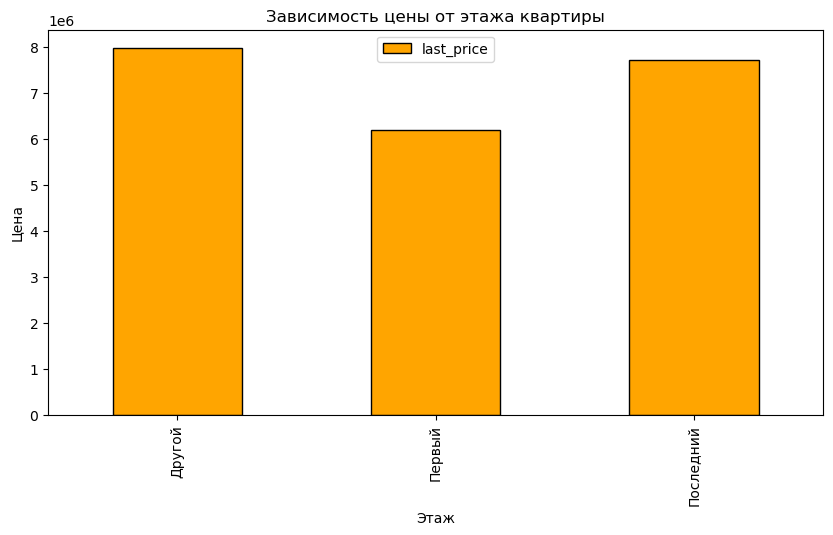

In [54]:
(central_area
 .pivot_table(
     index='floor_category', 
     values='last_price',
     aggfunc=['count', 
              'mean']
 )
 .plot(
     kind='bar',
     y='mean',
     ec='black',
     color='orange',
     figsize=(10, 5))
)

plt.title('Зависимость цены от этажа квартиры')
plt.ylabel('Цена')
plt.xlabel('Этаж')
plt.show()

Как и по всему городу, включая область, квартиры, расположенные на первом этаже в центральной зоне имеют самую низкую среднюю стоимость. Спрос на квартиры, расположенные на последнем этаже в центральной зоне в отличие от квартир по всему городу, включая область достаточно высокий, в центральной зоне открываются хорошие виды с последних этажей зданий на город, что делает такие квартиры только желаннее, а значит дороже, соотвественно, имеют высокую среднюю стоимость. Средняя стоимость квартир, попадающие в категорию 'Другой' незначительно дороже квартир, расположенных на последних этажах.

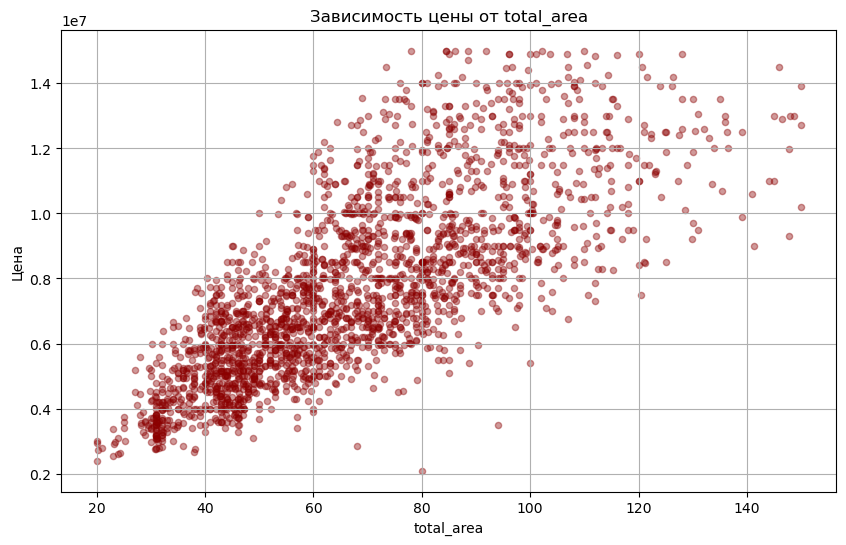

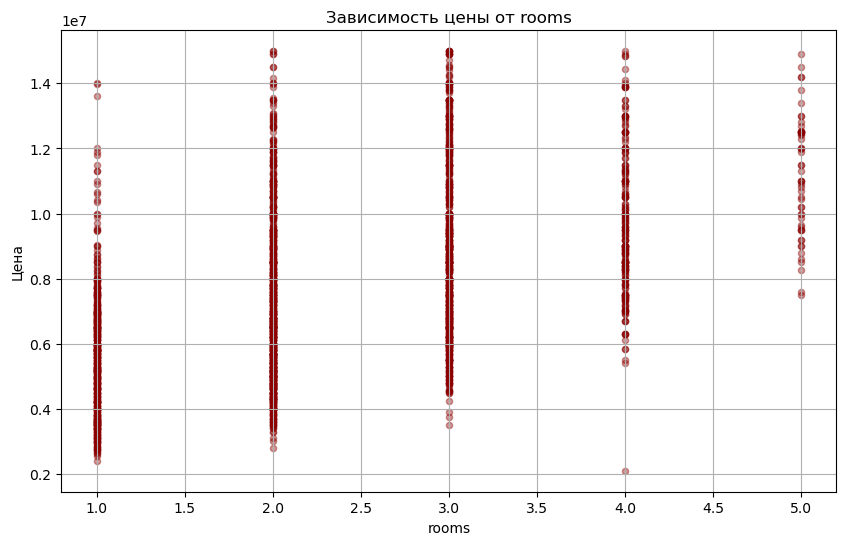

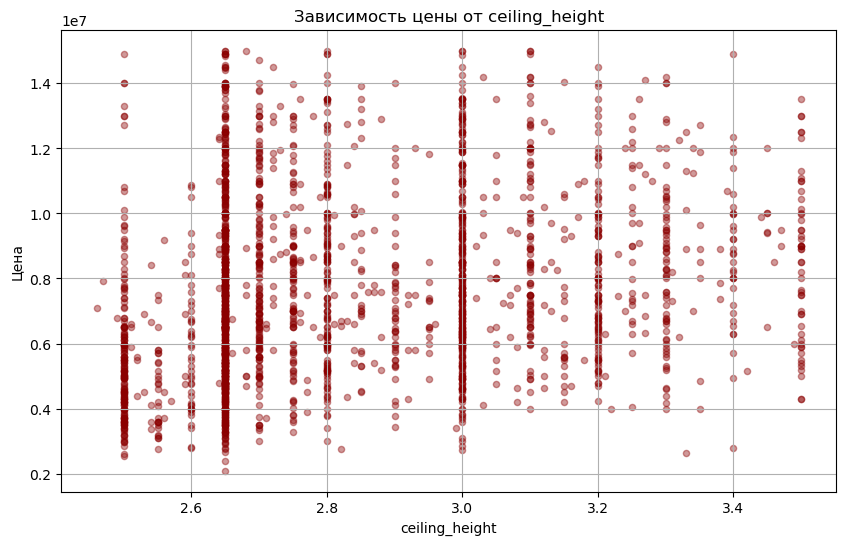

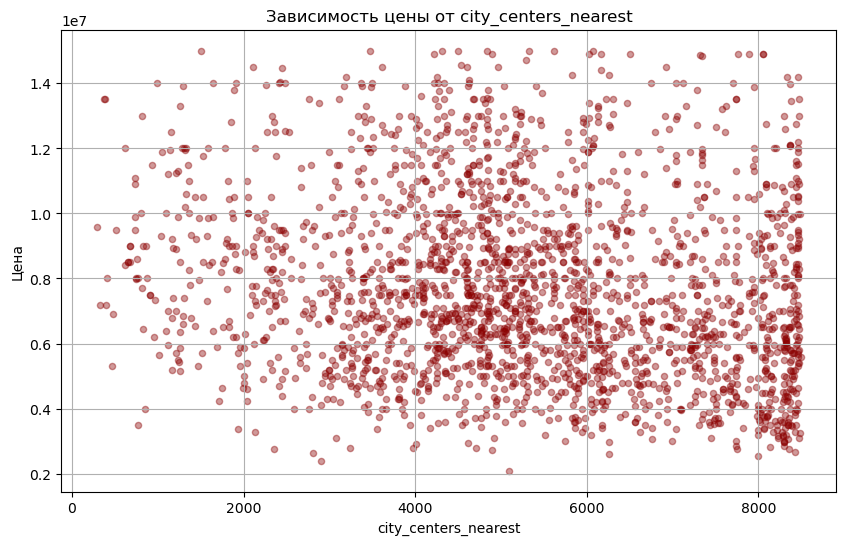

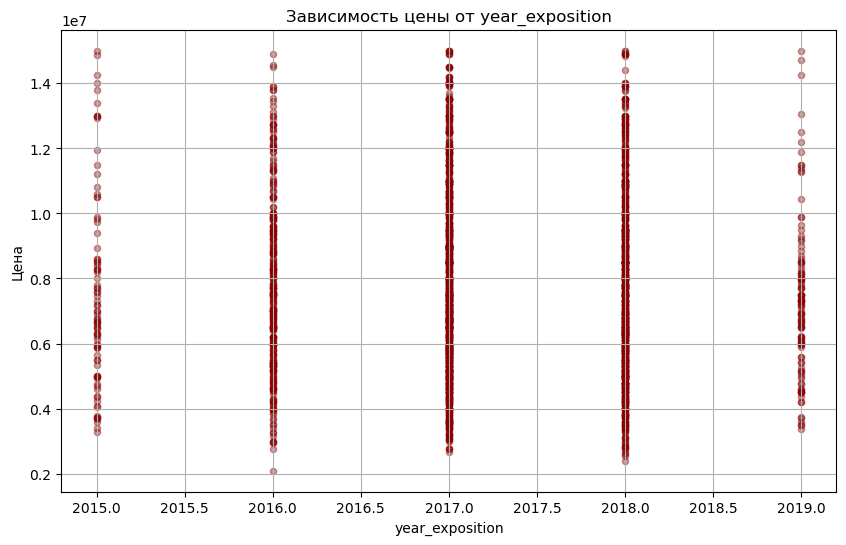

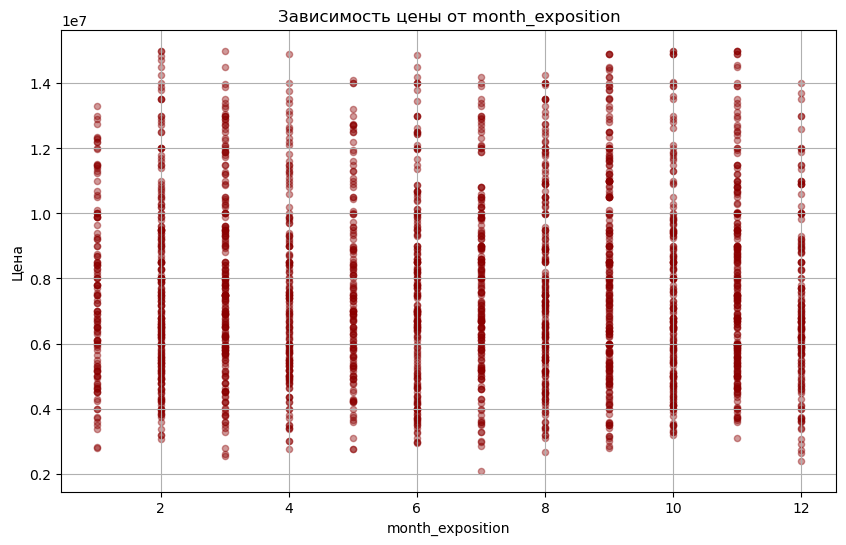

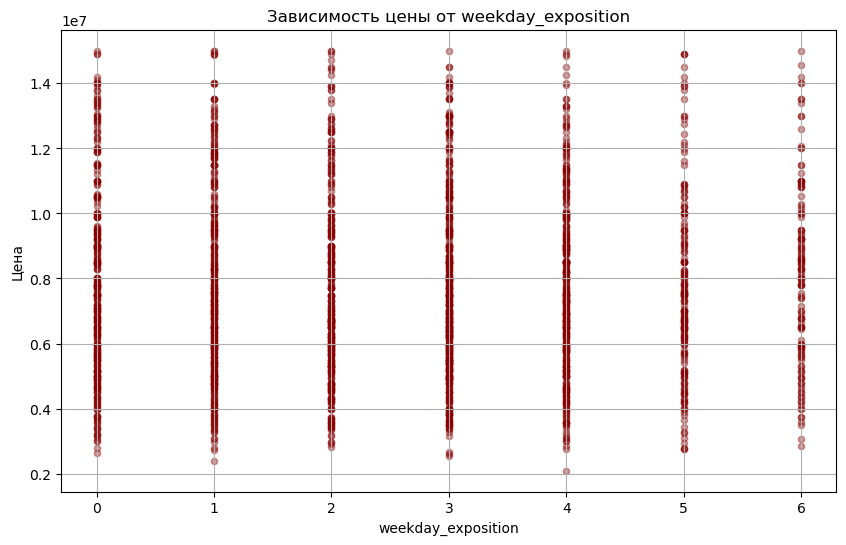

In [55]:
columns = ['total_area',
           'rooms',
           'ceiling_height',
           'city_centers_nearest',
           'year_exposition',
           'month_exposition',
           'weekday_exposition']
    
for column in columns:
    central_area.plot(kind='scatter',
                      x=column, 
                      y='last_price', 
                      grid=True,
                      alpha=0.4,
                      color='darkred',
                      figsize=(10, 6))
    plt.title(f'Зависимость цены от {column}')
    plt.ylabel('Цена')
    plt.xlabel(column)
    plt.show()

Связь между различными величинами в центральной зоне плохо прослеживается ввиду значительно меньшего числа объялений, однако, мы постараемся сделать наиболее правильные выводы. 

- Основная масса квартир 30 до 60 м2 со стоимостью от 2,5 до 8 млн руб. иными словами в центральной зоне верхний порог площади и цен больше, чем по всему городу, включая область. Чем больше площадь квартиры, тем слабее линейная связь, растет разброс значений.

- Цены на квартиры отличаются в зависимости от количества комнат по центральной зоне и по городу, включая область. В центральной зоне по всем квартирам нижний и верхний порог выше.

|Количество комнат        |Цена в центральной зоне, млн руб.|Цена по городу, включая область, млн руб.|
|:-----------------------:|:--------------------------------|:----------------------------------------|   
|1                        |от 2,3 до 9                      |от 0,7 до 6,5                            |   
|2                        |от 2,6 до 12,1                   |от 1 до 10                               |
|3                        |от 4,2 до 14                     |от 1,8 до 12                             |


- В центральной зоне аналогично наблюдается рост стоимости квартир с ростом высоты потолков. Для квартир с высотой потолков 2,5 метра цена от 3 до 7 млн руб., по квартирам с высотой потолков 2,65 метра цена от 3 до 13 млн руб, по квартирам с высотой потолков от 2,7 нижний порог цен от 4 млн руб.

- В приближением к центру города количество квартир снижается, основная масса объвлений по квартирам от 4 до 6 км от центра города. 
- Аналогично по городу, включая область, в центральной зоне не наблюдается четкая линейная связь между годом/месяцем/днем недели размещения объвления и ценой на квартиры.

[В начало](#intro)

## Общий вывод

В ходе проведения исследования были выявлены параметры квартир, влияющие на их рыночную стоимость, которые небходимо учитывать при построении автоматизированный системы по отслежванию аномалий и мошеннической деятельности, к которым относятся:
- площадь квартиры;
- количество комнат;
- высота потолков;
- этаж квартиры (первый, последний, другой);
- удаленность квартиры от центра города.

Что не обязательно учитывать при построении автоматизированный системы по отслеживанию аномалий и мошеннической деятельности по рыночной цене квартир:
- год публикации объявения;
- месяц публикации объявения;
- день недели публикации объявления.

Кроме того, рекомендуется отслеживать:
- сроки публикации объявления;
- регион публикации объявления.

Важное значение имеют региональные особенности, которые должно приниматься системой, чтобы не применять алгоритмы по отслеживанию аномалий и мошеннической деятельности по принципы  'средней температуры по больнице'.

Автоматизированная система также должна учитывать внешние факторы, например, годовую инфляцию при определении рычной стоимости квартир, и некоторый резерв под труднопрогнозируемые обстоятельства, возникновение которых сильно меняет рынок недвижимости.

[В начало](#intro)